<a href="https://colab.research.google.com/github/silverstar0727/1day-1commit-challenge/blob/master/machine_learning_ch13_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow를 활용한 신경망 훈련

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

'2.1.0'

In [0]:
!pip install tensorflow-gpu

     |████████████████████████████████| 421.8MB 37kB/s 


### tensorflow version 1.x

In [0]:
# 그래프 생성
g = tf.Graph()
with g.as_default():
  x = tf.compat.v1.placeholder(dtype = tf.float32, shape = (None), name = 'x')
  w = tf.Variable(2.0, name = 'weight')
  b = tf.Variable(0.7, name = 'bias')

  z = w * x + b
  init = tf.compat.v1.global_variables_initializer()

#세션 생성, g전달
with tf.compat.v1.Session(graph = g) as sess:
  # w와 b를 초기화
  sess.run(init)
  # z를 평가
  for t in [1.0, 0.6,-1.8]:
    print('x = %4.1f --> z = %4.1f' % (t, sess.run(z, feed_dict = {x:t})))


x =  1.0 --> z =  2.7
x =  0.6 --> z =  1.9
x = -1.8 --> z = -2.9


In [0]:
with tf.compat.v1.Session(graph = g) as sess:
  sess.run(init)
  print(sess.run(z, feed_dict = {x:[1.,2.,3.]}))


[2.7 4.7 6.7]


In [0]:
print(z)

Tensor("add:0", dtype=float32)


### tensorflow vesion 2.x

변수초기화나 Session등이 불필요함

In [0]:
w = tf.Variable(2.0, name = 'weight')
b = tf.Variable(0.7, name = 'bias')

# z를 평가
for x in [1.0, 0.6, -1.8]:
  z = w * x + b
  print('x = %4.1f --> z = %4.1f' % (x, z))

x =  1.0 --> z =  2.7
x =  0.6 --> z =  1.9
x = -1.8 --> z = -2.9


In [0]:
print(z)

tf.Tensor(-2.8999999, shape=(), dtype=float32)


In [0]:
z = w *[1., 2., 3.] + b
print(z.numpy())

[2.7 4.7 6.7]


## tensorflow로 배열다루기

In [0]:
import tensorflow as tf
import numpy as np

# 3*2*3 배열 생성
x_array = np.arange(18).reshape(3,2,3)
# 텐서를 일렬로 펼침
x2 = tf.reshape(x_array, shape = (-1, 6))

xsum = tf.reduce_sum(x2, axis = 0)
xmean = tf.reduce_mean(x2, axis = 0)

print('입력 크기:', x_array.shape)
print('크기가 변경된 입력: \n', x2.numpy())
print('열의 합:\n', xsum.numpy())
print('열의 평균:\n', xmean.numpy())

입력 크기: (3, 2, 3)
크기가 변경된 입력: 
 [[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]]
열의 합:
 [18 21 24 27 30 33]
열의 평균:
 [ 6  7  8  9 10 11]


## tensorflow로 저수준 API모델 개발

In [0]:
# dataset 생성
import tensorflow as tf
import numpy as np

X_train = np.arange(10).reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 7.4, 8.0, 9.0])

In [0]:
# 선형회귀 클래스 생성(경사하강법)
class TfLinreg(object):
  def __init__(self, learning_rate = 0.01):
    self.w = tf.Variable(tf.zeros(shape = (1)))
    self.b = tf.Variable(tf.zeros(shape = (1)))
    #경사하강법 옵티마이저 설정
    self.optimizer = tf.keras.optimizers.SGD(lr = learning_rate)

  def fit(self, X, y, num_epochs = 10):
    training_costs = []
    for step in range(num_epochs):
      #자동 미분을 위해 연산과정 기록
      with tf.GradientTape() as tape:
        z_net = self.w * X + self.b
        z_net = tf.reshape(z_net, [-1])
        sqr_errors = tf.square(z_net - y)
        mean_cost = tf.reduce_mean(sqr_errors)

      # 비용함수에 대한 가중치 그래디언트 계산
      grads = tape.gradient(mean_cost, [self.w, self.b])
      # 옵티마이저에 그래디언트 반영
      self.optimizer.apply_gradients(zip(grads, [self.w, self.b]))
      # 비용함수의 값을 저장
      training_costs.append(mean_cost.numpy())

    return training_costs
    
  def predict(self, X):
    return self.w * X + self.b

In [0]:
lrmodel = TfLinreg()
training_costs = lrmodel.fit(X_train, y_train)

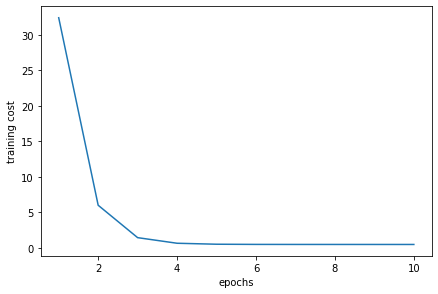

In [0]:
import matplotlib.pyplot as plt
plt.plot(range(1,len(training_costs) + 1), training_costs)
plt.tight_layout()
plt.xlabel('epochs')
plt.ylabel('training cost')
plt.show()

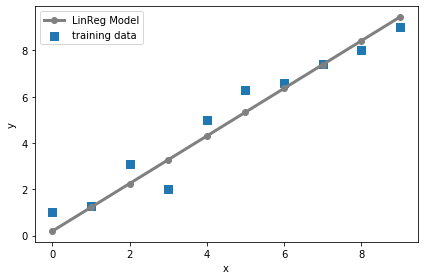

In [0]:
plt.scatter(X_train, y_train, marker = 's',  s = 50, label = 'training data')
plt.plot(range(X_train.shape[0]), lrmodel.predict(X_train), color = 'gray', marker = 'o', markersize = 6, linewidth = 3, label = 'LinReg Model')
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.legend()
plt.show()

In [0]:
# google drive와 연동
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# 연동 테스트 코드
with open('/content/gdrive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')

!cat /content/gdrive/My\ Drive/foo.txt

Hello Google Drive!

In [0]:
# MNIST dataset을 불러오는 함수 생성
import struct
import numpy as np

def load_mnist(path, kind = 'train'):
  labels_path = path + '/%s-labels.idx1-ubyte' % kind
  images_path = path + '/%s-images.idx3-ubyte' % kind
  print(labels_path, images_path)

  with open(labels_path, 'rb') as lbpath:
    magic, n = struct.unpack('>II', lbpath.read(8))
    labels = np.fromfile(lbpath, dtype = np.uint8)
        
  with open(images_path, 'rb') as imgpath:
    magic, num, rows, cols = struct.unpack('>IIII', imgpath.read(16))
    images = np.fromfile(imgpath,
                             dtype = np.uint8).reshape(len(labels), 784)
    # 정규화
    images = ((images / 255.) - .5) * 2
        
  return images, labels

In [0]:
X_train, y_train = load_mnist('/content/gdrive/My Drive/machine_learning/ch12', kind = 'train')
print('행: %d, 열: %d' % (X_train.shape[0], X_train.shape[1]))
X_test, y_test = load_mnist('/content/gdrive/My Drive/machine_learning/ch12', kind = 't10k')
print('행: %d, 열: %d' % (X_test.shape[0], X_test.shape[1]))

/content/gdrive/My Drive/machine_learning/ch12/train-labels.idx1-ubyte /content/gdrive/My Drive/machine_learning/ch12/train-images.idx3-ubyte
행: 60000, 열: 784
/content/gdrive/My Drive/machine_learning/ch12/t10k-labels.idx1-ubyte /content/gdrive/My Drive/machine_learning/ch12/t10k-images.idx3-ubyte
행: 10000, 열: 784


In [0]:
# 정규화
mean_vals = np.mean(X_train, axis = 0)
std_val = np.std(X_train)

X_train_centered = (X_train - mean_vals) / std_val
X_test_centered = (X_test - mean_vals) / std_val

print(X_train_centered.shape, y_train.shape)
print(X_test_centered.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [0]:
# 난수 초기값 설정
np.random.seed(123)

# 원핫인코딩
# to_categorical은 입력된 텐서에서 가장큰 정수를 찾아 원-핫 인코딩 크기를 결정함
y_train_onehot = tf.keras.utils.to_categorical(y_train)

print('처음 3개의 레이블: ', y_train[:3])
print('\n처음 3개 레이블 (원-핫): \n', y_train_onehot[:3])

처음 3개의 레이블:  [5 0 4]

처음 3개 레이블 (원-핫): 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [0]:
X_train_centered.shape[1]

784

In [0]:
y_train_onehot.shape[1]

10

## 피드포워드 신경망 구성
처음 두 층은 tanh를 활성화 함수로하는 50개의 은닉유닛

마지막 층은 소프트맥스 함수를 사용

In [0]:
model = tf.keras.models.Sequential()

# 활성화 함수는 tanh, input_dim은 784
model.add(tf.keras.layers.Dense(units = 50,
                                input_dim = X_train_centered.shape[1],
                                kernel_initializer = 'glorot_uniform', 
                                bias_initializer = 'zeros', 
                                activation = 'tanh'))

# 활성화 함수는 tanh, imput_dim은 50
model.add(tf.keras.layers.Dense(units = 50,
                                input_dim = 50,
                                kernel_initializer = 'glorot_uniform',
                                bias_initializer = 'zeros',
                                activation = 'tanh'))

#활성화 함수는 softmax, unit은 10, input_dim은 50
model.add(tf.keras.layers.Dense(units = y_train_onehot.shape[1],
                                input_dim = 50,
                                kernel_initializer = 'glorot_uniform',
                                bias_initializer = 'zeros',
                                activation = 'softmax'))

In [0]:
# 요약
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_4 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


## 피드포워드 신경망 훈련

In [0]:
# 모델컴파일(손실함수 결정 & 옵티마이저 결정))
sgd_optimizer = tf.keras.optimizers.SGD(lr = 0.001, decay = 1e-7, momentum = .9)

model.compile(optimizer = sgd_optimizer, loss = 'categorical_crossentropy')

In [0]:
# 미니배치 경사하강법
## validation_split은 데이터를 떼어내서 검증데이터로 사용
## 비용함수를 출력, 관찰하여 하이퍼파라미터를 튜닝해야함
history = model.fit(X_train_centered, y_train_onehot,
                    batch_size = 64, epochs = 50, verbose = 1, validation_split = 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 3s 47us/sample - loss: 0.7429 - val_loss: 0.3663
Epoch 2/50
54000/54000 [==============================] - 2s 40us/sample - loss: 0.3729 - val_loss: 0.2777
Epoch 3/50
54000/54000 [==============================] - 2s 40us/sample - loss: 0.3075 - val_loss: 0.2413
Epoch 4/50
54000/54000 [==============================] - 2s 40us/sample - loss: 0.2721 - val_loss: 0.2180
Epoch 5/50
54000/54000 [==============================] - 2s 40us/sample - loss: 0.2474 - val_loss: 0.2021
Epoch 6/50
54000/54000 [==============================] - 2s 39us/sample - loss: 0.2283 - val_loss: 0.1893
Epoch 7/50
54000/54000 [==============================] - 2s 38us/sample - loss: 0.2125 - val_loss: 0.1796
Epoch 8/50
54000/54000 [==============================] - 2s 39us/sample - loss: 0.1992 - val_loss: 0.1719
Epoch 9/50
54000/54000 [==============================] - 2s 39us/sample - loss: 0.1880 - val_l

In [0]:
y_train_pred = model.predict_classes(X_train_centered, verbose = 0)
print(y_train_pred[:5])

[6 9 0 8 0]


In [0]:
# 훈련세트와 테스트세트에서 모델 정확도 확인
correct_preds = np.sum(y_train == y_train_pred, axis = 0)
train_acc = correct_preds / y_train.shape[0]

print(train_acc * 100)

9.056666666666667


In [0]:
y_test_pred = model.predict_classes(X_test_centered, verbose = 0)
correct_preds = np.sum(y_test == y_test_pred, axis = 0)
test_acc = correct_preds / y_test.shape[0]

print(test_acc * 100)

8.3


## 다층신경망의 활성화 함수 선택
일반적으로 미분이 가능하다면 모든 함수 다층 신경망의 활성화 함수로 사용할 수 있다. 그러나 선형의 경우 그리 유용하지가 않다.

따라서 비선형함수를 사용해야하고, 로지스틱함수는 큰 음수의 값이 입력될 경우 문제가 된다. 따라서 은닉층에서 하이퍼볼릭 탄젠트함수를 주로사용한다.

In [0]:
# 로지스틱함수 요약
import numpy as np

X = np.array([1, 1.4, 2.5]) # 첫번째 원소는 1이어야함
w = np.array([0.4, 0.3, 0.5])

def net_input(X, w):
  return np.dot(X, w)

def logistic(z):
  return 1. / (1. + np.exp(-z))

def logistic_activation(X, w):
  z = net_input(X, w)
  return logistic(z)

print('샘플 x가 양성클래스에 속할확률')
print('P(y1|x) = %.3f' % logistic_activation(X, w))

샘플 x가 양성클래스에 속할확률
P(y1|x) = 0.888


In [0]:
# W: (n_hidden_units, n_hidden_units + 1) 그기의 배열
# 첫번째 열은 절편유닛입니다
W = np.array([[1.1, 1.2, 0.8, 0.4],
              [0.2, 0.4, 1.0, 0.2],
              [0.6, 1.5, 1.2, 0.7]])

# A: (n_hidden_units + 1, n_samples) 크기의 배열
# 배열의 첫번째 열은 1 입니다
A = np.array([[1, 0.1, 0.4, 0.6]])

Z = np.dot(W, A[0])
y_probas = logistic(Z)

print('최종 입력: \n', z)
print('출력 유닛: \n', y_probas)

#무엇인가 문제가 된다고 한다. 그렇기에 존재하는 코드라고 한다.
#그러나 나는 무엇이 문제인지 잘 모르겠다... ㅠㅠㅠ 다음에 와서 다시 확인할 것. 그렇게 중요해보이진 않으니..

최종 입력: 
 tf.Tensor([2.7 4.7 6.7], shape=(3,), dtype=float32)
출력 유닛: 
 [0.85569687 0.68135373 0.83889105]


In [0]:
y_class = np.argmax(Z, axis = 0)
print('예측 클래스 레이블: %d' % (y_class))

예측 클래스 레이블: 0


## 소프트맥스 함수를 사용한 다중클래스 확률 예측
소프트맥스 함수는 로지스틱함수를 일반화한 함수이다.

In [0]:
# 직접 구현
def softmax(z):
  return np.exp(z) / np.sum(np.exp(z))

y_probas = softmax(Z)
print(y_probas)

[0.44668973 0.16107406 0.39223621]


In [0]:
np.sum(y_probas)
# 함수가 출력을 정규화했다는 것을 확인

1.0

## 하이퍼볼릭 탄젠트로 출력 범위 넓히기
로지스틱함수의 출력범위는 0~1

하이퍼볼릭 함수의 출력범위는 -1~1

따라서 역전파 알고리즘의 수렴을 향상시킬 수 있음

In [0]:
# 시각화
import matplotlib.pyplot as plt

def tanh(z):
  e_p = np.exp(z)
  e_m = np.exp(-z)

  return (e_p - e_m) / (e_p + e_m)

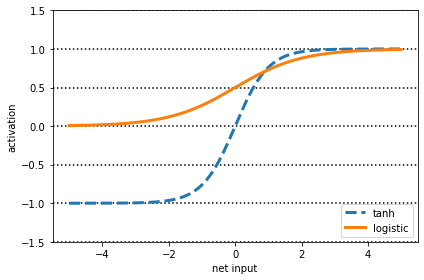

In [0]:
z = np.arange(-5, 5, 0.005)

log_act = logistic(z)
tanh_act = tanh(z)

plt.ylim([-1.5, 1.5])
plt.xlabel('net input')
plt.ylabel('activation')


plt.axhline(-1.5, color = 'black', linestyle = ':')
plt.axhline(-1.0, color = 'black', linestyle = ':')
plt.axhline(-0.5, color = 'black', linestyle = ':')
plt.axhline(0, color = 'black', linestyle = ':')
plt.axhline(0.5, color = 'black', linestyle = ':')
plt.axhline(1.0, color = 'black', linestyle = ':')
plt.axhline(1.5, color = 'black', linestyle = ':')

plt.plot(z, tanh_act, linewidth = 3, linestyle = '--', label = 'tanh')
plt.plot(z, log_act, linewidth = 3, label = 'logistic')
plt.legend(loc = 'lower right')
plt.tight_layout()
plt.show()

In [0]:
## 넘파이와 사이파이에 구현되어있음
tanh_act = np.tanh(z)

from scipy.special import expit
log_act = expit(z)